In [25]:
# Imports

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skforecast.plot import set_dark_theme
from skforecast.sarimax import Sarimax

In [35]:
news_df = pd.read_csv('data_collection/data/news/tsv/AMZN.tsv', sep='\t')
trades_df = pd.read_csv('data_collection/data/trades/tsv/AMZN.tsv', sep='\t')

data = trades_df.set_index('date')
# data.drop('volume', axis=1, inplace=True)
# data.drop('trades', axis=1, inplace=True)
data

,ticker,open,high,low,close,volume,volume_weighted,trades
date,,,,,,,,
2024-07-01,AMZN,193.490,198.2957,192.8200,197.20,41192011.0,196.1129,501335
2024-07-02,AMZN,197.280,200.4300,195.9300,200.00,45586383.0,198.7856,485434
2024-07-03,AMZN,199.940,200.0290,196.7601,197.59,30585326.0,198.0469,395363
2024-07-05,AMZN,198.650,200.5500,198.1700,200.00,38858685.0,199.8660,451243
2024-07-08,AMZN,200.040,201.2000,197.9600,199.29,34756586.0,199.4209,443698
...,...,...,...,...,...,...,...,...
2025-04-22,AMZN,169.845,176.7800,169.3500,173.18,56607202.0,173.2470,617509
2025-04-23,AMZN,183.450,187.3800,180.1900,180.60,63470094.0,183.1208,732655
2025-04-24,AMZN,180.915,186.7400,180.1800,186.54,43051696.0,184.8668,516091


Train dates : 2024-07-01 --- 2024-11-22  (n=103)
Test dates  : 2024-11-25 --- 2025-04-28  (n=104)


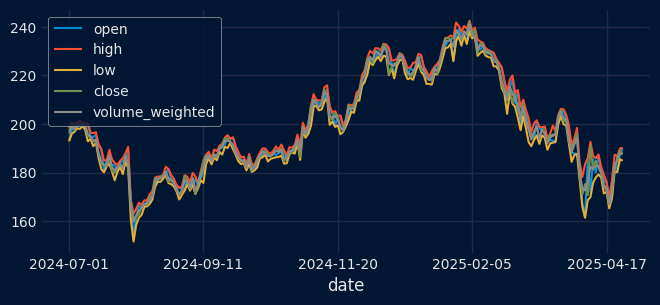

In [ ]:

# Train-test dates
# ==============================================================================
end_train = '2024-11-24'
print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})"
)
print(
    f"Test dates  : {data.loc[end_train:].index.min()} --- {data.loc[:].index.max()}  "
    f"(n={len(data.loc[end_train:])})"
)

# Drop volume and trades for now
data_train = data.loc[:end_train].drop(columns=['volume', 'trades'])
data_test = data.loc[end_train:].drop(columns=['volume', 'trades'])

# Plot
# ==============================================================================
set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 3))
data.drop(columns=['volume', 'trades']).plot(ax=ax)
ax.legend();

In [ ]:
arima = Sarimax()
arima.fit(y=)